In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load Dataset
carslm = pd.read_csv('./carslm.csv')
carslm.head()

,id,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [3]:
#Drop ID Column
dfnew =carslm.drop('id',axis=1)
dfnew.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [4]:
#Show Key Statistics
dfnew.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [5]:
#Overview of Dataset Characteristics
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes


In [6]:
#Create Profile Report
    
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
#Profile Report
carslmReport = pp.ProfileReport(dfnew)
carslmReport.to_file('carslmReport2a.html')
display(IFrame('carslmReport2a.html', width=900, height=350))

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

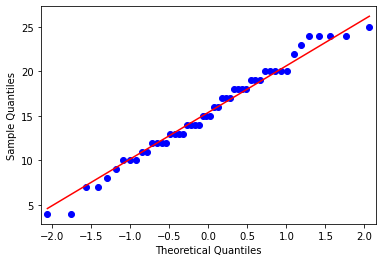

In [7]:
#Create Q-Q Plot
from statsmodels.graphics.gofplots import qqplot
import pylab
qqplot(dfnew['speed'],line='s')
pylab.show()

In [8]:
#Normality test - Shapiro-Wilk Test

#    p <= alpha(0.05): reject H0, not normal.
#   p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro
stat, p = shapiro(dfnew['speed'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.978, p=0.458
Sample looks Gaussian (fail to reject H0)


In [9]:
#Define x and y variable
x=dfnew['speed'].to_numpy()
y=dfnew['dist'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Converting variables to 2D
x_train2 = x_train.reshape(-1,1)
x_test2 = x_test.reshape(-1,1)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train3 = sc.fit_transform(x_train2)
x_test3 = sc.transform(x_test2)

#Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
#Create Orginal Model
for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train3,y_train)
    predict = method.predict(x_test3)

print('\nOriginal Model')
print('\nMethod: {}'.format(name)) 

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
print('Coefficient: {:0.2f}'.format((float(method.coef_))))
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test,predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Original Model

Method: Linear regression

Intercept: 41.20
Coefficient: 19.94

R2: 0.79
Mean Absolute Error: 8.80
Mean Squared Error: 121.11
Root Mean Squared Error: 11.01


In [11]:
#If Not normal you can use Yeo-Johnson Transformation

#Load Dataset
dataset_trf=carslm.drop('id',axis=1)

#Define x and y variable
x_trf=dataset_trf['speed'].to_numpy()
y_trf=dataset_trf['dist'].to_numpy()

#Load Library for Training Dataset
from sklearn.model_selection import train_test_split
x_train_trf,x_test_trf,y_train_trf,y_test_trf=train_test_split(x_trf,y_trf,test_size=0.2,random_state=100)

#Converting variables to 2D
x_train_trf = x_train_trf.reshape(-1,1)
x_test_trf = x_test_trf.reshape(-1,1)
y_train_trf = y_train_trf.reshape(-1,1)
y_test_trf = y_test_trf.reshape(-1,1)

#Scale Independent Variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_trf = sc.fit_transform(x_train_trf)
x_test_trf = sc.transform(x_test_trf)

#Tranform Dependent Variable
from sklearn.preprocessing import power_transform
transf_ytrain=power_transform(y_train_trf,method='yeo-johnson')
transf_ytest=power_transform(y_test_trf,method='yeo-johnson')

In [12]:
#Create Tranformed Model
for name,method2 in [('Linear regression', LinearRegression())]: 
    method2.fit(x_train_trf,transf_ytrain)
    predict = method2.predict(x_test_trf)

print('\nTransformed Model - Yeo-Johnson')
print('\nMethod: {}'.format(name)) 

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method2.intercept_)))
print('Coefficient: {:0.2f}'.format((float(method2.coef_))))
    
#R2 and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(transf_ytest,predict)))
print('Root Mean Squared Error: {:0.2f}'.format(np.exp(np.sqrt(metrics.mean_squared_error(transf_ytest, predict))))) 


Transformed Model - Yeo-Johnson

Method: Linear regression

Intercept: 0.00
Coefficient: 0.82

R2: 0.66
Root Mean Squared Error: 1.80


In [13]:
#Predictions 
raw_data={'speedNew':[4]}
dfnew=pd.DataFrame(raw_data, columns = ['speedNew'])
dfnewdataset = pd.DataFrame(raw_data, columns = ['speedNew']).values
print('Prediction Distance - Original: {:0.2f}'.format(float(method.predict(dfnewdataset))))
print('Prediction Distance - Transformed Model: {:0.2f}'.format((float(method2.predict(dfnewdataset)*10))))

Prediction Distance - Original: 120.96
Prediction Distance - Transformed Model: 32.95
